In [6]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [46]:
#loading the data from csv to pandas dataframe
df=pd.read_csv("car_data.csv")

In [8]:
#inspecting the first 5 rows of the dataframe
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
#checking the number of rows and columns
df.shape

(301, 9)

In [11]:
#checking the missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [47]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [53]:
#df[df['Present_Price']>10.00000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
16,ertiga,2015,7.25,10.79,41678,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
29,ciaz,2015,7.45,10.38,45000,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
289,city,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


In [15]:
#checking the distribution of the categorical data
print(df.Fuel_Type.value_counts())
print("------------------------------")
print(df.Seller_Type.value_counts())
print("------------------------------")
print(df.Transmission.value_counts())
print("------------------------------")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
------------------------------
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
------------------------------
Manual       261
Automatic     40
Name: Transmission, dtype: int64
------------------------------


# Encoding the categorical data

In [16]:
#encoding the "Fuel_type" column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding the "Seller_Type" column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding the "Transmission" column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data and target

In [19]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [20]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [21]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting the training data and test data

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

# Model training by using Linear regression

In [35]:
#loading the Linear Regression model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluate the model

In [36]:
#prediction on training data
training_data_prediction=model.predict(X_train)

#R-squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.8788102076855941


In [37]:
#prediction on test data
test_data_prediction=model.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.8635018684158624


# Visualize the actual prices and predicted prices

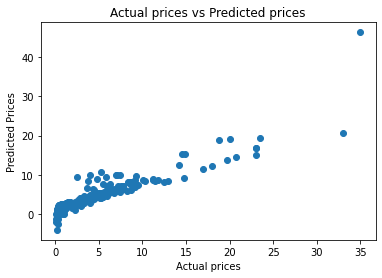

In [43]:
#Visualization for training data
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

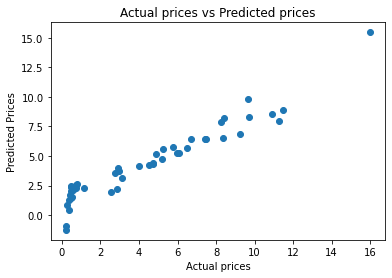

In [44]:
#Visualization for test data
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

# Using Lasso Regression

In [38]:
model1=Lasso()
model1.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
#prediction on training data
training_data_prediction=model1.predict(X_train)

#R-squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.8400293350672257


In [40]:
#prediction on test data
test_data_prediction=model1.predict(X_test)

#R-squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R-squared error:",error_score)

R-squared error: 0.8940142482159141


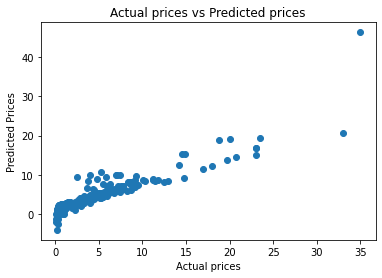

In [41]:
#Visualization for training data
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

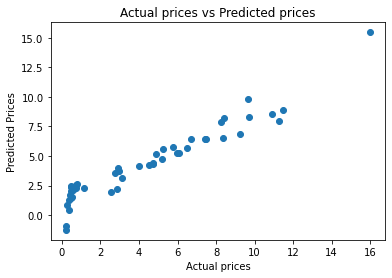

In [42]:
#Visualization for test data
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [54]:
import pickle

In [55]:
pickle.dump(model1,open('LinearRegression.pkl','wb'))

In [58]:
model1.predict(pd.DataFrame([[2014,5.59,27000,0,0,0,0]],columns=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']))

array([3.81208812])